## Callibrating our classifier

In [1]:
import pandas as pd
from sklearn.calibration import calibration_curve
from scipy.special import softmax
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics

In [2]:
example_preds = pd.read_json("../../results/example_preds.jsonl", lines=True)


In [3]:
len(example_preds["classification_labels"][1])

67

In [4]:
softmax(np.concatenate(example_preds["classification_logits"].values), axis =1)[:,-1].shape

(282660,)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 282660 but corresponding boolean dimension is 279165

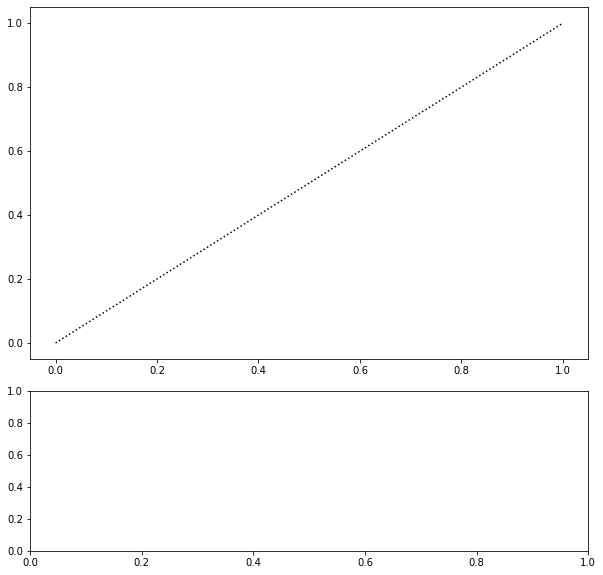

In [5]:
def plot_calibration_curve(eval_results_path, pad_idx=0,
                           logit_col = "classification_logits", 
                           label_col = "classification_labels"):
    
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    
    example_preds = pd.read_json(eval_results_path, lines=True)

        
    y_test = np.concatenate(example_preds["classification_labels"].values)
    mask = y_test!=-100
    y_test = y_test[mask]
    prob_pos = softmax(np.concatenate([x for x in example_preds["classification_logits"].values]), axis =0)[:,-1][mask]
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=50)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-")

    ax2.hist(prob_pos, range=(0, 1), bins=50, 
             histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)
plot_calibration_curve("../../results/example_preds.jsonl",pad_idx=1)

Youden's J=0.0015736189035888968
Youden's J=0.2652069609959398
Youden's J=0.17582228241310216


<AxesSubplot:title={'center':'ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

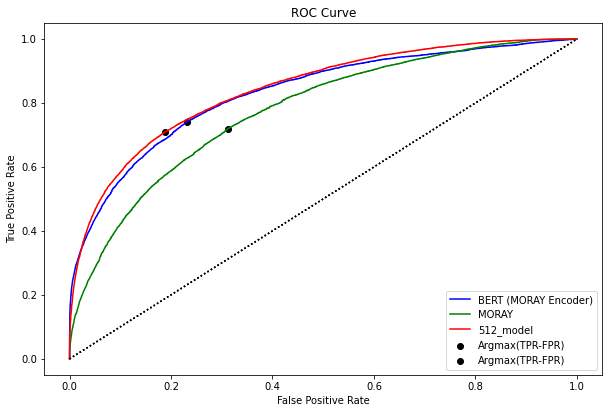

In [7]:
def plot_roc_curve(eval_results_path,pad_idx=0,
                  logit_col = "classification_logits", 
                  label_col = "classification_labels",
                  ax1 = None,
                  name=None,
                  color="b"):
    example_preds = pd.read_json(eval_results_path, lines=True)
    
    y_test = np.concatenate(example_preds[label_col].values)
    mask = y_test!=-100
    y_test = y_test[mask]
    prob_pos = softmax(np.concatenate([x[pad_idx:] for x in example_preds[logit_col].values]), axis =1)[:,-1][mask]
    
    
    if not ax1:
        plt.figure(figsize=(10, 10))
        ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

    fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_pos)

    ax1.plot(fpr,tpr, "-", color=color, label=name)
    ax1.plot([0, 1], [0, 1], "k:")

    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    

    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    
    ax1.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Argmax(TPR-FPR)')
    
    print(f"Youden's J={best_thresh}")
    ax1.set_title('ROC Curve')
    
    return ax1

def plot_roc_curves(paths,names,colors):
    for i,(p,n,c) in enumerate(zip(paths,names,colors)):
        if i == 0:
            ax = plot_roc_curve(p,name=n,color=c)
        else:
            plot_roc_curve(p,name=n,color=c,ax1=ax)
    return ax 
# plot_roc_curve("../../results/example_preds.jsonl", pad_idx=1)
roc_results = (
    ["../../results/finetuned_only/gentle-waterfall-270/eval-preds-44280.jsonl",
#     "../../results/mox-hyak/multiclass_www_final.jsonl",
#     "../../results/fanciful-deluge-271/eval-preds-166020.jsonl",
    "../../results/hearty-wildflower-273/eval-preds-166020.jsonl",
    "../../results/mox-hyak/iconic-paper-274.jsonl"],
    ["BERT (MORAY Encoder)","MORAY","512_model"],
    ["b","g","r"]
)

plot_roc_curves(*roc_results)

In [45]:
!head -n1 ../../results/example_preds.jsonl

{"input": "return model, history", "label": "elapsed_time = time.time() - start_time\nreturn model, history, elapsed_time", "prediction": "return model, history\nX_test, X_test, y_test, X_test, y_test, X_test, y_test, X_test, y_test, y_test = test_data(X_test, y, X_test, y, test_size=0.1)", "input_ids": [0, 2016, 713, 16, 6043, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "label_ids": [52000, 11081, 67, 661, 266, 842, 18, 661, 309, 410, 1306, 67, 661, 203, 52001, 2016, 713, 16, 6043, 52000, 16, 8336, 67, 661, 52001, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "pred": [0, 2016, 713, 16, 6043, 2, 52000, 203, 60, 67, 403, 16, 616, 67, 403, 16, 387, 67, 403, 16, 616, 67, 403, 16, 387, 67, 403, 16, 616, 67, 403, 16, 387, 67, 403, 16, 616, 67, 403, 16, 387, 67, 403, 1

## What about the 10x Classifier?

In [18]:
df = pd.read_json("../../results/mox-hyak/10x_pos_weight_loss_preds.jsonl", lines=True)
y_test = np.concatenate(df["classification_labels"].values)

In [22]:
y_test = np.concatenate(df["classification_labels"].values)
prob_pos = softmax(np.concatenate([x for x in df["classification_logits"].values]), axis =1)[:,-1]

No handles with labels found to put in legend.


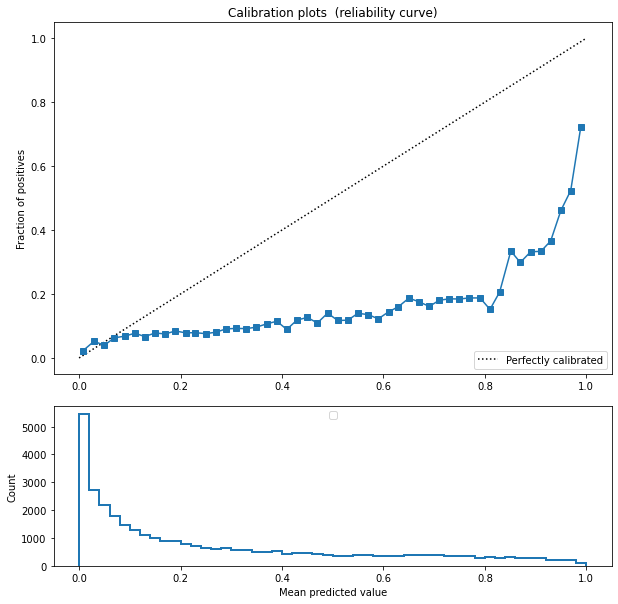

In [28]:
plot_calibration_curve("../../results/mox-hyak/10x_pos_weight_loss_preds.jsonl")

In [41]:
plot_roc_curve("../../results/mox-hyak/10x_pos_weight_loss_preds.jsonl")

ValueError: zero-dimensional arrays cannot be concatenated

No handles with labels found to put in legend.


Best Threshold=0.087146


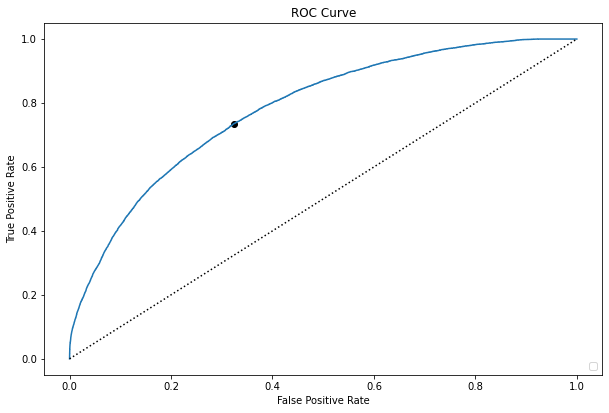

In [67]:
plot_roc_curve("../../results/mox-hyak/multiclass_www_final.jsonl")

No handles with labels found to put in legend.


Best Threshold=0.036315


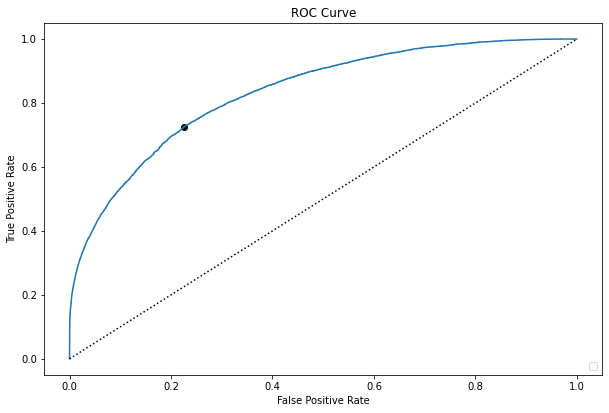

In [66]:
plot_roc_curve("../../results/finetuned_only/gentle-waterfall-270/eval-preds-20000.jsonl")

In [59]:
!head -n1 ../../results/finetuned_only/splendid-paper-265/eval-preds-44280.jsonl

{"input": "return model, history", "classification_labels": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "classification_logits": [[6.178743362426758, -6.864444732666016], [2.4390363693237305, -4.021159648895264], [3.3779184818267822, -4.7420759201049805], [3.9167230129241943, -5.082238674163818], [3.744370222091675, -4.981780529022217], [6.2027587890625, -6.875794410705566], [-6.31874418258667, 7.361374378204346], [-6.322900772094727, 7.359281063079834], [-6.321582317352295, 7.361124038696289], [-6.3271894454956055, 7.357511043548584], [-6.32082986831665, 7.362461566925049], [-6.3216094970703125, 7.362605571746826], [-6.324848651885986, 7.36019515991

In [42]:
!head -n1 ../../results/mox-hyak/multiclass_www_final.jsonl

{"input": "return model, history", "label": "elapsed_time = time.time() - start_time\nreturn model, history, elapsed_time", "prediction": "return model, history", "input_ids": [0, 2016, 713, 16, 6043, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "label_ids": [52000, 11081, 67, 661, 266, 842, 18, 661, 309, 410, 1306, 67, 661, 203, 52001, 2016, 713, 16, 6043, 52000, 16, 8336, 67, 661, 52001, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "pred": [0, 2016, 713, 16, 6043, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## What's the class imbalance?

In [ ]:
pd.Series(y_test).value_counts()

In [ ]:
example_preds.head()[example_preds["classification_labels"].map(lambda x: not any([xx==0 for xx in x ]))]